In [1]:
import py_compile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from dotenv import load_dotenv
import glob
from mymodule import myfunc as mf
load_dotenv()
imgout = "../imgout/"
root_dir = "../"


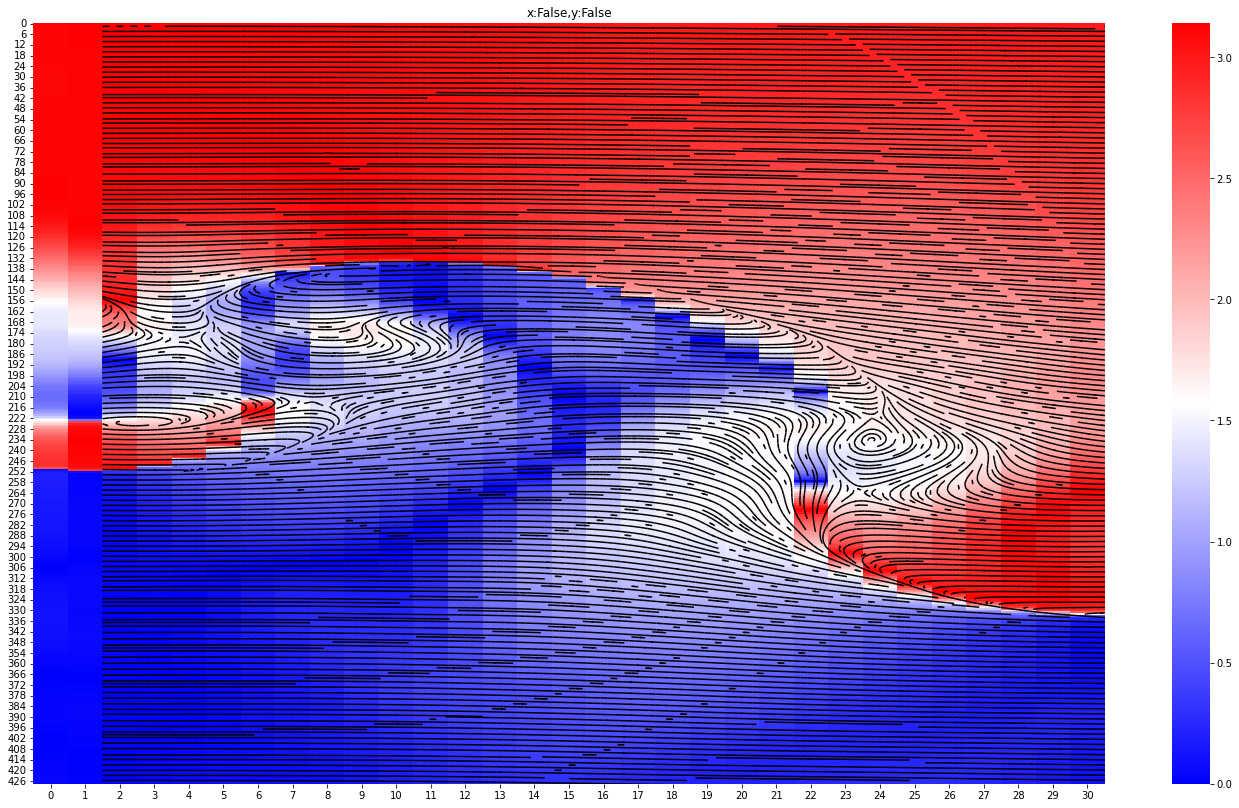

In [6]:

######################
def stream_plt(X, Y, xrange=False, yrange= False, compress=0):
    dataX = X
    dataY = Y
    if xrange:
        # dataX = X[350:700, 304:384]
        # dataY = Y[350:700, 304:384]
        dataX = dataX[:,xrange[0]:xrange[1]]
        dataY = dataY[:,xrange[0]:xrange[1]]

    if yrange:
        dataX = dataX[yrange[0]:yrange[1],:]
        dataY = dataY[yrange[0]:yrange[1],:]

    #計算が重いので平滑化フィルターの畳み込みで圧縮
    if compress:
        carnel1 = mf.ave_carnel(compress)
        carnel2 = carnel1.T
        dataX = mf.convolute(dataX, carnel2,stride=compress)
        dataY = mf.convolute(dataY, carnel1,stride=compress)
    x = range(dataX.shape[1])
    y = range(dataY.shape[0])
    #X,Y方向それぞれのベクトルに対して座標の行列を設定
    X, Y = np.meshgrid(x, y)
    #X,Y方向それぞれのベクトルの強さ
    u = dataX
    v = dataY
    color = u**2 + v**2
    color = color*2/max(color.flat)
    #########rotの計算途中の微分でデータの端っこが削れる
    rot = mf.rot2d(u, v)
    u = u[2:-2,2:-2]
    v = v[2:-2,2:-2]
    X = X[2:-2,2:-2]
    Y = Y[2:-2,2:-2]
    ##########
    rad = np.arccos(u/np.sqrt(u**2+v**2))
    color2 = np.array(v) / np.array(u)
    color2 = color2 - min(color2.flat)
    color2 = color2/max(color2.flat)
    speed = np.sqrt(u**2 + v**2)
    lw = 7*speed / speed.max()

    fig = plt.figure(figsize=[24,14])
    ax = fig.add_subplot()
    ax.set_title(f"x:{xrange},y:{yrange}")
    # plt.contour(X,Y,rad)
    # mf.show(rad)#,bar_range=[-0.05,0.05])
    sns.heatmap(rad, cmap="bwr")
    # sns.heatmap(dataY)
    # plot = plt.pcolor(rad, cmap="bwr")
    #strm = plt.streamplot(X, Y, u, v, density=[5], color=color, arrowstyle='-', linewidth=1,cmap="rainbow")
    # strm = plt.streamplot(X, Y, u, v, density=[3], color=rot, arrowstyle='-', linewidth=lw,cmap="rainbow")
    strm = plt.streamplot(X, Y, u, v, density=[5], color="black", arrowstyle='-', linewidth=1.5,cmap="bwr", minlength=0.001)


    #strm = plt.streamplot(X, Y, u, v, density=[1,5], color=black, arrowstyle='-|>', linewidth=1)
    
    #fig.colorbar(strm.lines)
    # plt.show()


        

######################
# para = 1
# job =14
# datax = mf.load(r"C:\Users\lkxl1\OneDrive\デスクトップ\research\src\mymodule\StreamLines\magfield1")
# datay = mf.load(r"C:\Users\lkxl1\OneDrive\デスクトップ\research\src\mymodule\StreamLines\magfield2")
# datax = mf.load(mf.gen_snap_path("magfieldX",para,job), z=3)
# datay = mf.load(mf.gen_snap_path("magfieldY",para,job), z=3)
# datax = np.load(r"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap49split1\magfieldx\0\0_magfieldx.01.14.npy")
# datay = np.load(r"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap49split1\magfieldy\0\0_magfieldy.01.14.npy")
# stream_plt(datax,datay)

In [ ]:
number =0
xranges = [[10,70],[60,120],[110,150],[140,190],[170,250],[230,300]]
yranges = [[400,650]]
for yrange in yranges:
    for xrange in xranges:
        number += 1
        for job in [7,8,9,10,11,12,13,14]:
            for para in range(1,80,79):
                try:
                    dataX = mf.load(mf.gen_snap_path("magfieldX",para,job), z=3)
                    dataY = mf.load(mf.gen_snap_path("magfieldY",para,job), z=3)
                except FileNotFoundError:
                    continue
                plt.clf()
                stream =stream_plt(dataX,dataY, xrange=xrange, yrange=yrange)
        
                #plt.savefig(f"{imgout}1018magline/stream.{'{0:02d}'.format(job)}.{'{0:02d}'.format(para)}.png")
                plt.savefig(f"{imgout}1025strm49/{number}/stream{number}.{'{0:02d}'.format(job)}.{'{0:02d}'.format(para)}.png")
                plt.close()